# Syntehtic Data - Comparison of GMM, KNN and AE results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff 
from sklearn import preprocessing
import pickle
from utils.utils_gmm import *
import matplotlib.transforms as mtrans
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 13
BIGGER_SIZE = 17

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
min_max_scaler = preprocessing.MinMaxScaler()

knn_results = pd.read_csv("results/knn_synthetic_scored.csv", index_col=0)
knn_distances = pd.read_csv("results/knn_synthetic_distances.csv", index_col=0)
knn_distances_scaled = knn_distances / np.max(knn_distances.values)

gm_results = pd.read_csv("results/gm_synthetic_scored.csv", index_col=0)
gm_distances = pd.read_csv("results/gm_synthetic_distances.csv", index_col=0)
gm_distances_scaled = gm_distances / np.max(gm_distances.values)

ae_results = pd.read_csv("results/ae_synthetic_scored.csv", index_col=0)
ae_distances = pd.read_csv("results/ae_synthetic_distances.csv", index_col=0)
ae_distances_scaled = ae_distances / np.max(ae_distances.values)

data = pd.read_csv("data/synthetic_data_6d.csv", index_col=0)
#data = pd.DataFrame(min_max_scaler.fit_transform(data.values), columns=data.columns)

In [4]:
# and later you can load it
with open('results/gmm_synthetic.pkl', 'rb') as f:
    gmm = pickle.load(f)
with open('results/neighbors_synthetic.pkl', 'rb') as f:
    neighbors = pickle.load(f)

gmm, neighbors

(GaussianMixture(n_components=2, random_state=42),
 array([[   0,    1,  587, ...,  936,  952,  840],
        [   1,  507,  797, ...,  648,  294,  519],
        [   2,  407,  443, ...,  733,  426,   60],
        ...,
        [1997, 1663, 1561, ..., 1592, 1975, 1812],
        [1998, 1352, 1337, ..., 1043, 1333, 1480],
        [1999, 1315, 1395, ..., 1023, 1473, 1732]], dtype=int64))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

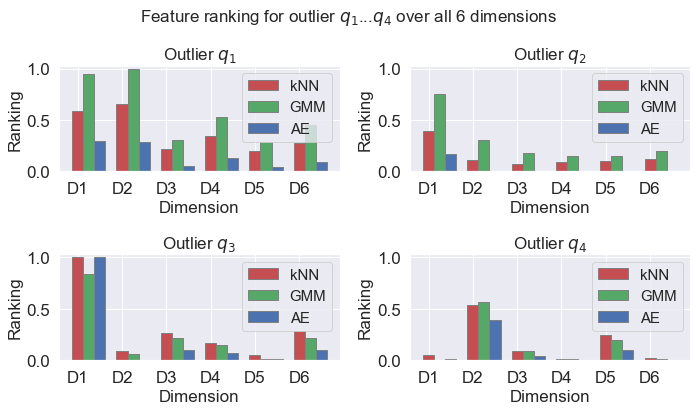

In [5]:
# Plot the feature ranking per outlier
barWidth = 0.25
fig, axes = plt.subplots(2, 2, figsize=(10,5.5))
 
outlier_idx = [0, 1, 1001, 1002]

for i, ax in enumerate(axes.flatten()):
    # set height of bar
    knn = knn_distances_scaled.loc[outlier_idx[i]].values
    gm = gm_distances_scaled.loc[outlier_idx[i]].values
    ae = ae_distances_scaled.loc[outlier_idx[i]].values

    # Set position of bar on X axis
    br1 = np.arange(len(knn))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    ax.bar(br1, knn, color ='r', width = barWidth,
            edgecolor ='grey', label ='kNN')
    ax.bar(br2, gm, color ='g', width = barWidth,
            edgecolor ='grey', label ='GMM')
    ax.bar(br3, ae, color ='b', width = barWidth,
            edgecolor ='grey', label ='AE')

    # Adding Xticks
    ax.set_xlabel('Dimension')
    ax.set_ylabel('Ranking')
    ax.set_ylim([0, 1.03])
    ax.set_xticks([r for r in range(len(knn))])
    ax.set_xticklabels([f"D{x+1}" for x in range(len(knn) +1)])
    ax.legend()
    ax.set_title("Outlier " + f"$q_{i+1}$")
 
fig.suptitle("Feature ranking for outlier $q_1$...$q_4$ over all 6 dimensions", y=1.05)
fig.tight_layout()
plt.savefig("images/synthetic_data_ranking.eps", bbox_inches="tight")
plt.show()

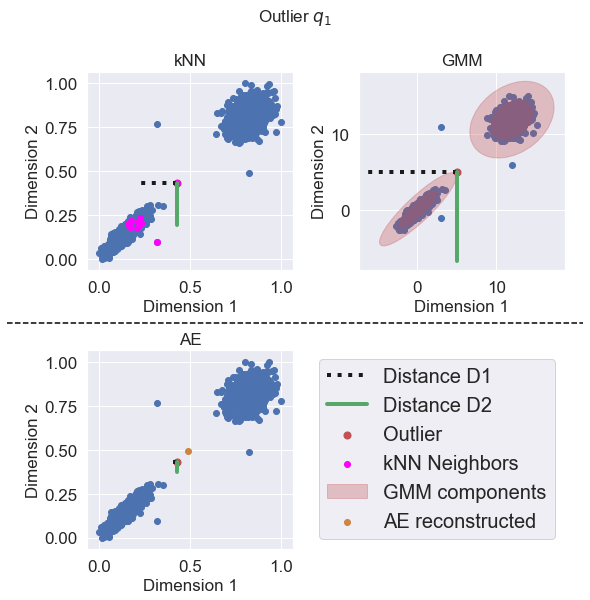

In [6]:
#plot the feature ranking as dista
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

idx = outlier_idx[0]

fig.suptitle("Outlier " + "$q_{1}$", y=1.05)

for ax, distances, approach in zip(axes, [knn_distances, gm_distances, ae_distances], ["kNN", "GMM", "AE"]):
    data_values = data.copy()
    if approach == "GMM":
        cols = [0, 1]
        w_factor = 0.5 / gmm.weights_.max()
        c = 0
        for _, (pos, covar, w) in enumerate(zip(gmm.means_[[c]][:, cols], gmm.covariances_[[c]][:, cols, :][:, :, cols], gmm.weights_[[c]])):
            draw_ellipse(pos, covar, alpha=0.3, ax=ax, c="r", nr_patches=3, label="GMM components")
        c = 1
        for _, (pos, covar, w) in enumerate(zip(gmm.means_[[c]][:, cols], gmm.covariances_[[c]][:, cols, :][:, :, cols], gmm.weights_[[c]])):
            draw_ellipse(pos, covar, alpha=0.3, ax=ax, c="r", nr_patches=3, label="GMM components")
    else:
        data_values = pd.DataFrame(min_max_scaler.fit_transform(data.values), columns=data.columns)
    ax.scatter(data_values["f0"], data_values["f1"])
    point = data_values.loc[idx][["f0", "f1"]].values
    dist = distances.loc[idx][["f0", "f1"]].values
    ax.plot([point[0],point[0]-dist[0]], [point[1],point[1]], c="k", linestyle='dotted', lw=4, label="Distance D1")
    ax.plot([point[0],point[0]], [point[1],point[1]-dist[1]], c="g", lw=4, label="Distance D2")
    ax.scatter(data_values.loc[idx]["f0"], data_values.loc[idx]["f1"], c="r", label="Outlier", s=50)
    if approach == "kNN":
        ax.scatter(data_values.iloc[neighbors[idx]]["f0"], data_values.iloc[neighbors[idx]]["f1"], c="magenta", label="kNN Neighbors")
    
    if approach == "AE":
        rec_x = point[0]+dist[0]
        rec_y = point[1]+dist[1]
        ax.scatter([rec_x], [rec_y], c="peru", label="AE reconstructed")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")        
    ax.set_title(approach)
    #ax.legend(loc="upper left")
axes[-1].axis('off')
axes[-1].legend(*axes[0].get_legend_handles_labels(), loc='lower right', prop={'size': 20})
fig.tight_layout()

obj = []
desc = []
obj.extend(axes[0].get_legend_handles_labels()[0])
desc.extend(axes[0].get_legend_handles_labels()[1])
obj.append(axes[1].get_legend_handles_labels()[0][2])
desc.append(axes[1].get_legend_handles_labels()[1][2])
obj.append(axes[2].get_legend_handles_labels()[0][3])
desc.append(axes[2].get_legend_handles_labels()[1][3])
axes[-1].axis('off')
axes[-1].legend(obj, desc, loc='lower right', prop={'size': 20})
#axes[1].get_legend().remove()
fig.tight_layout()

axes = axes.reshape(2, 2)
# Get the bounding boxes of the axes including text decorations
r = fig.canvas.get_renderer()
get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
bboxes = np.array(list(map(get_bbox, axes.flat)), mtrans.Bbox).reshape(axes.shape)

#Get the minimum and maximum extent, get the coordinate half-way between those
ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axes.shape).max(axis=1)
ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axes.shape).min(axis=1)
ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

# Draw a horizontal lines at those coordinates
for y in ys:
    line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black", linestyle="--")
    fig.add_artist(line)

plt.savefig("images/p1_outlier_ranking_visualized.svg", bbox_inches="tight")
plt.show()

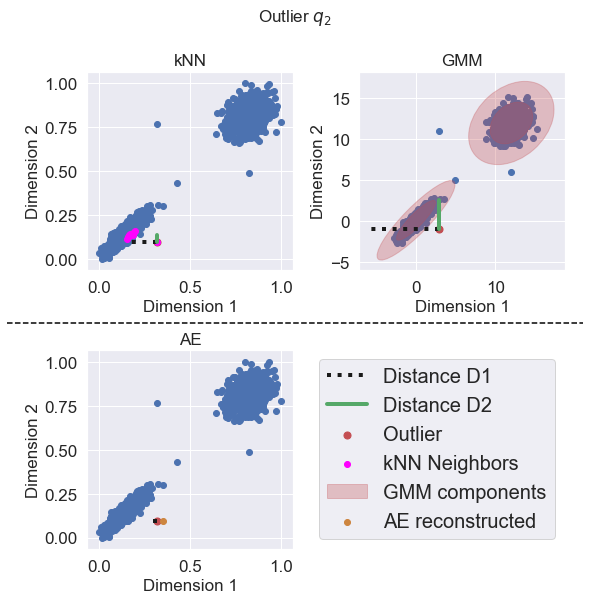

In [10]:
#plot the feature ranking as dista
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

idx = outlier_idx[1]

fig.suptitle("Outlier " + "$q_{2}$", y=1.05)

for ax, distances, approach in zip(axes, [knn_distances, gm_distances, ae_distances], ["kNN", "GMM", "AE"]):
    data_values = data.copy()
    if approach == "GMM":
        cols = [0, 1]
        w_factor = 0.5 / gmm.weights_.max()
        c = 0
        for _, (pos, covar, w) in enumerate(zip(gmm.means_[[c]][:, cols], gmm.covariances_[[c]][:, cols, :][:, :, cols], gmm.weights_[[c]])):
            draw_ellipse(pos, covar, alpha=0.3, ax=ax, c="r", nr_patches=3, label="GMM components")
        c = 1
        for _, (pos, covar, w) in enumerate(zip(gmm.means_[[c]][:, cols], gmm.covariances_[[c]][:, cols, :][:, :, cols], gmm.weights_[[c]])):
            draw_ellipse(pos, covar, alpha=0.3, ax=ax, c="r", nr_patches=3, label="GMM components")
    else:
        data_values = pd.DataFrame(min_max_scaler.fit_transform(data.values), columns=data.columns)
    ax.scatter(data_values["f0"], data_values["f1"])
    point = data_values.loc[idx][["f0", "f1"]].values
    dist = distances.loc[idx][["f0", "f1"]].values
    ax.plot([point[0],point[0]-dist[0]], [point[1],point[1]], c="k", linestyle='dotted', lw=4, label="Distance D1")
    ax.plot([point[0],point[0]], [point[1],point[1]+dist[1]], c="g", lw=4, label="Distance D2")
    ax.scatter(data_values.loc[idx]["f0"], data_values.loc[idx]["f1"], c="r", label="Outlier", s=50)
    if approach == "kNN":
        ax.scatter(data_values.iloc[neighbors[idx]]["f0"], data_values.iloc[neighbors[idx]]["f1"], c="magenta", label="kNN Neighbors")
    
    if approach == "AE":
        rec_x = point[0]+dist[0]
        rec_y = point[1]+dist[1]
        ax.scatter([rec_x], [rec_y], c="peru", label="AE reconstructed")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")        
    ax.set_title(approach)
    #ax.legend(loc="upper left")
axes[-1].axis('off')
axes[-1].legend(*axes[0].get_legend_handles_labels(), loc='lower right', prop={'size': 20})
fig.tight_layout()

obj = []
desc = []
obj.extend(axes[0].get_legend_handles_labels()[0])
desc.extend(axes[0].get_legend_handles_labels()[1])
obj.append(axes[1].get_legend_handles_labels()[0][2])
desc.append(axes[1].get_legend_handles_labels()[1][2])
obj.append(axes[2].get_legend_handles_labels()[0][3])
desc.append(axes[2].get_legend_handles_labels()[1][3])
axes[-1].axis('off')
axes[-1].legend(obj, desc, loc='lower right', prop={'size': 20})
#axes[1].get_legend().remove()
fig.tight_layout()

axes = axes.reshape(2, 2)
# Get the bounding boxes of the axes including text decorations
r = fig.canvas.get_renderer()
get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
bboxes = np.array(list(map(get_bbox, axes.flat)), mtrans.Bbox).reshape(axes.shape)

#Get the minimum and maximum extent, get the coordinate half-way between those
ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axes.shape).max(axis=1)
ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axes.shape).min(axis=1)
ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

# Draw a horizontal lines at those coordinates
for y in ys:
    line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black", linestyle="--")
    fig.add_artist(line)

plt.savefig("images/p2_outlier_ranking_visualized.svg", bbox_inches="tight")
plt.show()

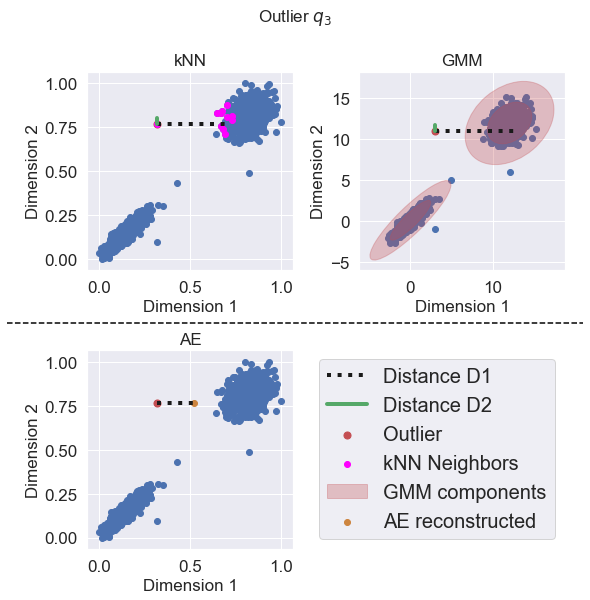

In [11]:
#plot the feature ranking as dista
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

idx = outlier_idx[2]

fig.suptitle("Outlier " + "$q_{3}$", y=1.05)

for ax, distances, approach in zip(axes, [knn_distances, gm_distances, ae_distances], ["kNN", "GMM", "AE"]):
    data_values = data.copy()
    if approach == "GMM":
        cols = [0, 1]
        w_factor = 0.5 / gmm.weights_.max()
        c = 0
        for _, (pos, covar, w) in enumerate(zip(gmm.means_[[c]][:, cols], gmm.covariances_[[c]][:, cols, :][:, :, cols], gmm.weights_[[c]])):
            draw_ellipse(pos, covar, alpha=0.3, ax=ax, c="r", nr_patches=3, label="GMM components")
        c = 1
        for _, (pos, covar, w) in enumerate(zip(gmm.means_[[c]][:, cols], gmm.covariances_[[c]][:, cols, :][:, :, cols], gmm.weights_[[c]])):
            draw_ellipse(pos, covar, alpha=0.3, ax=ax, c="r", nr_patches=3, label="GMM components")
    else:
        data_values = pd.DataFrame(min_max_scaler.fit_transform(data.values), columns=data.columns)
    ax.scatter(data_values["f0"], data_values["f1"])
    point = data_values.loc[idx][["f0", "f1"]].values
    dist = distances.loc[idx][["f0", "f1"]].values
    ax.plot([point[0],point[0]+dist[0]], [point[1],point[1]], c="k", linestyle='dotted', lw=4, label="Distance D1")
    ax.plot([point[0],point[0]], [point[1],point[1]+dist[1]], c="g", lw=4, label="Distance D2")
    ax.scatter(data_values.loc[idx]["f0"], data_values.loc[idx]["f1"], c="r", label="Outlier", s=50)
    if approach == "kNN":
        ax.scatter(data_values.iloc[neighbors[idx]]["f0"], data_values.iloc[neighbors[idx]]["f1"], c="magenta", label="kNN Neighbors")
    
    if approach == "AE":
        rec_x = point[0]+dist[0]
        rec_y = point[1]+dist[1]
        ax.scatter([rec_x], [rec_y], c="peru", label="AE reconstructed")

    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.set_title(approach)
    #ax.legend(loc="upper left")
axes[-1].axis('off')
axes[-1].legend(*axes[0].get_legend_handles_labels(), loc='lower right', prop={'size': 20})
fig.tight_layout()

obj = []
desc = []
obj.extend(axes[0].get_legend_handles_labels()[0])
desc.extend(axes[0].get_legend_handles_labels()[1])
obj.append(axes[1].get_legend_handles_labels()[0][2])
desc.append(axes[1].get_legend_handles_labels()[1][2])
obj.append(axes[2].get_legend_handles_labels()[0][3])
desc.append(axes[2].get_legend_handles_labels()[1][3])
axes[-1].axis('off')
axes[-1].legend(obj, desc, loc='lower right', prop={'size': 20})
#axes[1].get_legend().remove()
fig.tight_layout()

axes = axes.reshape(2, 2)
# Get the bounding boxes of the axes including text decorations
r = fig.canvas.get_renderer()
get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
bboxes = np.array(list(map(get_bbox, axes.flat)), mtrans.Bbox).reshape(axes.shape)

#Get the minimum and maximum extent, get the coordinate half-way between those
ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axes.shape).max(axis=1)
ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axes.shape).min(axis=1)
ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

# Draw a horizontal lines at those coordinates
for y in ys:
    line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black", linestyle="--")
    fig.add_artist(line)

plt.savefig("images/p3_outlier_ranking_visualized.svg", bbox_inches="tight")
plt.show()

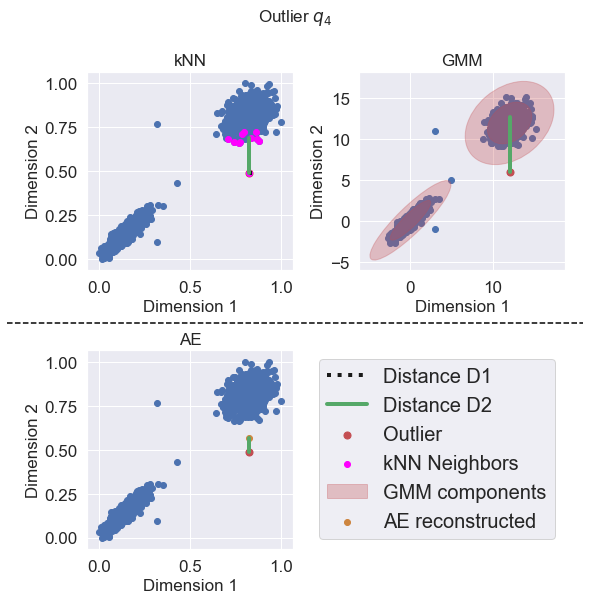

In [12]:
#plot the feature ranking as dista
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

idx = outlier_idx[3]

fig.suptitle("Outlier " + "$q_{4}$", y=1.05)

for ax, distances, approach in zip(axes, [knn_distances, gm_distances, ae_distances], ["kNN", "GMM", "AE"]):
    data_values = data.copy()
    if approach == "GMM":
        cols = [0, 1]
        w_factor = 0.5 / gmm.weights_.max()
        c = 0
        for _, (pos, covar, w) in enumerate(zip(gmm.means_[[c]][:, cols], gmm.covariances_[[c]][:, cols, :][:, :, cols], gmm.weights_[[c]])):
            draw_ellipse(pos, covar, alpha=0.3, ax=ax, c="r", nr_patches=3, label="GMM components")
        c = 1
        for _, (pos, covar, w) in enumerate(zip(gmm.means_[[c]][:, cols], gmm.covariances_[[c]][:, cols, :][:, :, cols], gmm.weights_[[c]])):
            draw_ellipse(pos, covar, alpha=0.3, ax=ax, c="r", nr_patches=3, label="GMM components")
    else:
        data_values = pd.DataFrame(min_max_scaler.fit_transform(data.values), columns=data.columns)
    ax.scatter(data_values["f0"], data_values["f1"])
    point = data_values.loc[idx][["f0", "f1"]].values
    dist = distances.loc[idx][["f0", "f1"]].values
    ax.plot([point[0],point[0]+dist[0]], [point[1],point[1]], c="k", linestyle='dotted', lw=4, label="Distance D1")
    ax.plot([point[0],point[0]], [point[1],point[1]+dist[1]], c="g", lw=4, label="Distance D2")
    ax.scatter(data_values.loc[idx]["f0"], data_values.loc[idx]["f1"], c="r", label="Outlier", s=50)
    if approach == "kNN":
        ax.scatter(data_values.iloc[neighbors[idx]]["f0"], data_values.iloc[neighbors[idx]]["f1"], c="magenta", label="kNN Neighbors")
    
    if approach == "AE":
        rec_x = point[0]+dist[0]
        rec_y = point[1]+dist[1]
        ax.scatter([rec_x], [rec_y], c="peru", label="AE reconstructed")
    
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.set_title(approach)
    #ax.legend(loc="upper left")
axes[-1].axis('off')
axes[-1].legend(*axes[0].get_legend_handles_labels(), loc='lower right', prop={'size': 20})
fig.tight_layout()

obj = []
desc = []
obj.extend(axes[0].get_legend_handles_labels()[0])
desc.extend(axes[0].get_legend_handles_labels()[1])
obj.append(axes[1].get_legend_handles_labels()[0][2])
desc.append(axes[1].get_legend_handles_labels()[1][2])
obj.append(axes[2].get_legend_handles_labels()[0][3])
desc.append(axes[2].get_legend_handles_labels()[1][3])
axes[-1].axis('off')
axes[-1].legend(obj, desc, loc='lower right', prop={'size': 20})
#axes[1].get_legend().remove()
fig.tight_layout()

axes = axes.reshape(2, 2)
# Get the bounding boxes of the axes including text decorations
r = fig.canvas.get_renderer()
get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
bboxes = np.array(list(map(get_bbox, axes.flat)), mtrans.Bbox).reshape(axes.shape)

#Get the minimum and maximum extent, get the coordinate half-way between those
ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axes.shape).max(axis=1)
ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axes.shape).min(axis=1)
ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

# Draw a horizontal lines at those coordinates
for y in ys:
    line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black", linestyle="--")
    fig.add_artist(line)


plt.savefig("images/p4_outlier_ranking_visualized.svg", bbox_inches="tight")
plt.show()